In [1]:
from pyexpat import model
from matplotlib.lines import lineMarkers
import numpy as np
import matplotlib.pyplot as plt
import deepchem as dc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF



No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!


Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


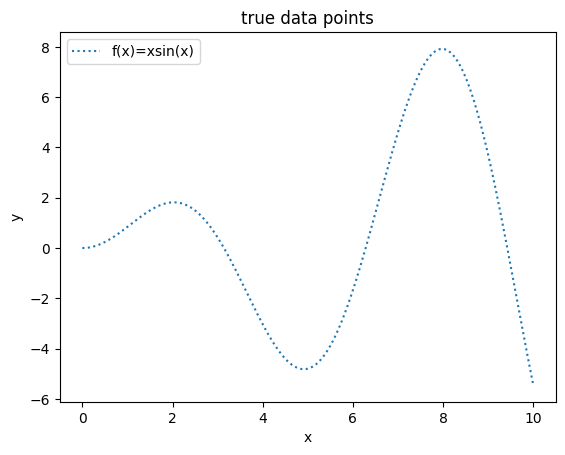

In [10]:
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
plt.plot(X,y,label='f(x)=xsin(x)',linestyle='dotted')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("true data points")
plt.show()

In [11]:
range = np.random.RandomState(1) #generates numbers arround 1
training_indices = range.choice(np.arange(y.size), size=7, replace=False)
X_train, y_train = X[training_indices], y[training_indices]#generate date that diviates from the sinus function to train model


In [21]:
trainData = dc.data.NumpyDataset(X_train,y_train)
testData = dc.data.NumpyDataset(X)

#splitter =  dc.splits.RandomSplitter()
#trainData, validData, testData = splitter.train_valid_test_split(dataset=dataset, frac_train=0.7, frac_valid=0.2, frac_test=0.1)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
model = dc.models.SklearnModel(GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9))

print("fitting model")
model.fit(trainData)
print("model is fitted")
mean_prediction = model.predict(testData)
std_prediction = dc.metric
print(mean_prediction)

fitting model
model is fitted
[-5.22300047e-01 -5.15328447e-01 -5.08227675e-01 -5.00997625e-01
 -4.93638217e-01 -4.86149397e-01 -4.78531135e-01 -4.70783427e-01
 -4.62906292e-01 -4.54899780e-01 -4.46763963e-01 -4.38498940e-01
 -4.30104838e-01 -4.21581811e-01 -4.12930037e-01 -4.04149727e-01
 -3.95241113e-01 -3.86204459e-01 -3.77040057e-01 -3.67748225e-01
 -3.58329310e-01 -3.48783689e-01 -3.39111766e-01 -3.29313976e-01
 -3.19390781e-01 -3.09342672e-01 -2.99170173e-01 -2.88873834e-01
 -2.78454237e-01 -2.67911991e-01 -2.57247739e-01 -2.46462151e-01
 -2.35555929e-01 -2.24529806e-01 -2.13384543e-01 -2.02120935e-01
 -1.90739804e-01 -1.79242007e-01 -1.67628430e-01 -1.55899988e-01
 -1.44057631e-01 -1.32102338e-01 -1.20035118e-01 -1.07857015e-01
 -9.55691020e-02 -8.31724827e-02 -7.06682935e-02 -5.80577021e-02
 -4.53419073e-02 -3.25221396e-02 -1.95996610e-02 -6.57576465e-03
  6.54822450e-03  1.97709503e-02  3.30910251e-02  4.65070301e-02
  6.00175149e-02  7.36209982e-02  8.73159673e-02  1.01100878

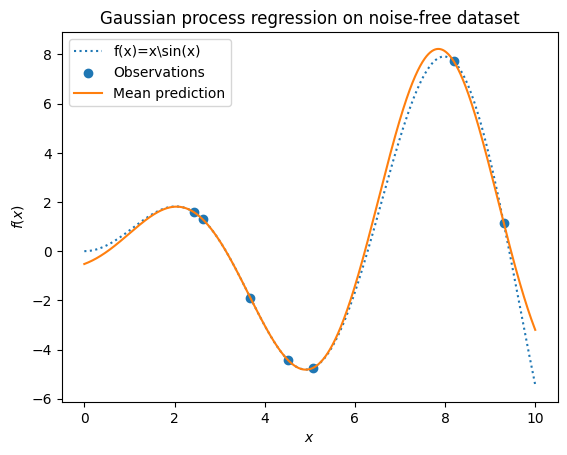

In [22]:
#plot the data
plt.plot(X, y, label="f(x)=x\sin(x)", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
"""plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)"""
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()